# Lab I - Dimensionality Reduction
## Machine Learning II

Melissa Arevalo Garnica

In [1]:
import numpy as np
import pandas as pd
from unsupervised.dim_red.SVD import SVD
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import gridspec

## Workshop I

1. Simulate any random rectangular matrix A.
- What is the rank and trace of A?
- What is the determinant of A?
- Can you invert A? How?
- How are eigenvalues and eigenvectors of A’A and AA’ related? What interesting differences can you notice between both?


Matrix simulation with *numpy.random.randint()*

In [2]:
A = np.random.randint(10, size=(4,4))
print(f"A = \n{A}")

A = 
[[1 9 5 5]
 [7 7 4 4]
 [2 7 4 4]
 [6 4 0 8]]


The rank of a matrix A is the dimension of its row spaces and column and is denoted by range(A).

With python we can calculate the rank of the matrix using *numpy.linalg.matrix_rank()*

In [3]:
rank_matrix = np.linalg.matrix_rank(A)
print(f"rank(A) = {rank_matrix}")

rank(A) = 4


The trace of a matrix $A_{[ij]}$ de of $n$ is the sum of the entries on its main diagonal and is denoted by $tr(A)$.

$tr(A2) = a_{11} + a_{22} + ... + a_{nn}$

In [4]:
trace_matrix = np.trace(A)
print(f"tr(A) = {trace_matrix}")

tr(A) = 20


We calculate the determinant of the matrix with *np.linalg.det()*

In [5]:
det_matrix = np.linalg.det(A)
print(f"det(A) = {det_matrix.round()}")

det(A) = -40.0


A matrix is ​​invertible if the determinant is different from zero. In this case $det(A) = 408$ so we can calculate the inverse matrix with np.linalg.inv()

In [6]:
inv_matrix = np.linalg.inv(A)
print(f"inv(A) = \n{inv_matrix.round(2)}")

inv(A) = 
[[ 0.    0.2  -0.2   0.  ]
 [ 4.    1.2  -6.2   0.  ]
 [-5.   -1.45  7.95 -0.12]
 [-2.   -0.75  3.25  0.12]]


$A'A$ eigenvalues ​​are the same as $AA'$ eigenvalues

In [7]:
ATA = A.T @ A  # product A^T*A
AAT = A @ A.T  # product A*A^T

# Eigenvalues and eigenvectors of A^TA
eigenvalues_ATA, eigenvectors_ATA = np.linalg.eig(ATA)

# Eigenvalues and eigenvectors of AA^T
eigenvalues_AAT, eigenvectors_AAT = np.linalg.eig(AAT)

print(f"A^T*A = \n{ATA}")
print(f"Eigenvalues of A^TA: = {eigenvalues_ATA.round()}")
print(f"Eigenvectors of A^TA: = \n{eigenvectors_ATA.round(2)}\n\n")


print(f"A*A^T = \n{AAT}")
print(f"Eigenvalues of AA^T: = {eigenvalues_AAT.round()}")
print(f"Eigenvectors of AA^T: = \n{eigenvectors_AAT.round(2)}")

A^T*A = 
[[ 90  96  41  89]
 [ 96 195 101 133]
 [ 41 101  57  57]
 [ 89 133  57 121]]
Eigenvalues of A^TA: = [402.  48.  13.   0.]
Eigenvectors of A^TA: = 
[[-0.4  -0.65 -0.65 -0.02]
 [-0.68  0.44 -0.   -0.59]
 [-0.33  0.49 -0.3   0.75]
 [-0.52 -0.39  0.7   0.31]]


A*A^T = 
[[132 110 105  82]
 [110 130  95 102]
 [105  95  85  72]
 [ 82 102  72 116]]
Eigenvalues of AA^T: = [402.  48.   0.  13.]
Eigenvectors of AA^T: = 
[[ 0.54  0.55 -0.53  0.36]
 [ 0.55 -0.15 -0.16 -0.81]
 [ 0.45  0.31  0.83  0.08]
 [ 0.46 -0.76 -0.    0.46]]


2. Add a steady, well-centered picture of your face to a shared folder alongside your classmates.
- Edit your picture to be 256x256 pixels, grayscale (single channel)
- Plot your edited face
- Calculate and plot the average face of the cohort.

In [8]:
image_path = r"C:\Users\DO IT WISER\Documents\Personal\machine_learning2\Task\Task_1\img_personal\Melissa_Arevalo_1.jpeg"
image = Image.open(image_path)
width, height = image.size

print(f"Width = {width} px")
print(f"Height = {height} px")

Width = 1200 px
Height = 1200 px


Resize the image to 250x250 pixels

In [9]:
new_width = 250
new_height = 250
resized_image = image.resize((new_width, new_height))

resized_image_path = r"C:\Users\DO IT WISER\Documents\Personal\machine_learning2\Task\Task_1\img_personal\Melissa_Arevalo_1_resized.jpeg"
resized_image.save(resized_image_path)

resized_width, resized_height = resized_image.size

print(f"New width = {resized_width} px")
print(f"New height = {resized_height} px")

New width = 250 px
New height = 250 px


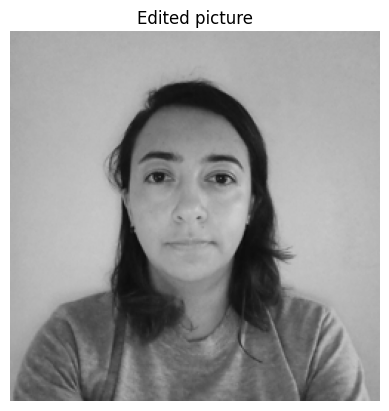

In [10]:
plt.imshow(resized_image)
plt.title("Edited picture")
plt.axis('off')
plt.show()

In [11]:
def plot_images(images, titles):
    fig = plt.figure(figsize=(15, 10))
    gs = gridspec.GridSpec(2, 3)

    for i in range(len(images)):
        ax = plt.subplot(gs[i])
        ax.imshow(images[i], cmap='gray')
        ax.set_title(titles[i])
        ax.axis('off')

    plt.tight_layout()
    plt.show()

def plot_images_with_singular_values(A, svd, singular_values):
    original_image = A

    images = [original_image]
    titles = ['Original']

    for nsing_vals in singular_values:
        svd.nsing_vals = nsing_vals
        transformed_image = svd.fit_transform(A)
        images.append(transformed_image)
        titles.append(f'Singular Values: {nsing_vals}')

    plot_images(images, titles)

In [12]:
# Cargar la imagen
img = Image.open(r"C:\Users\DO IT WISER\Documents\Personal\machine_learning2\Task\Task_1\img_personal\Melissa_Arevalo_1.jpeg")

gray_imag = img.convert('L')

# Convertir la imagen en una matriz NumPy
img_array = np.array(gray_imag)

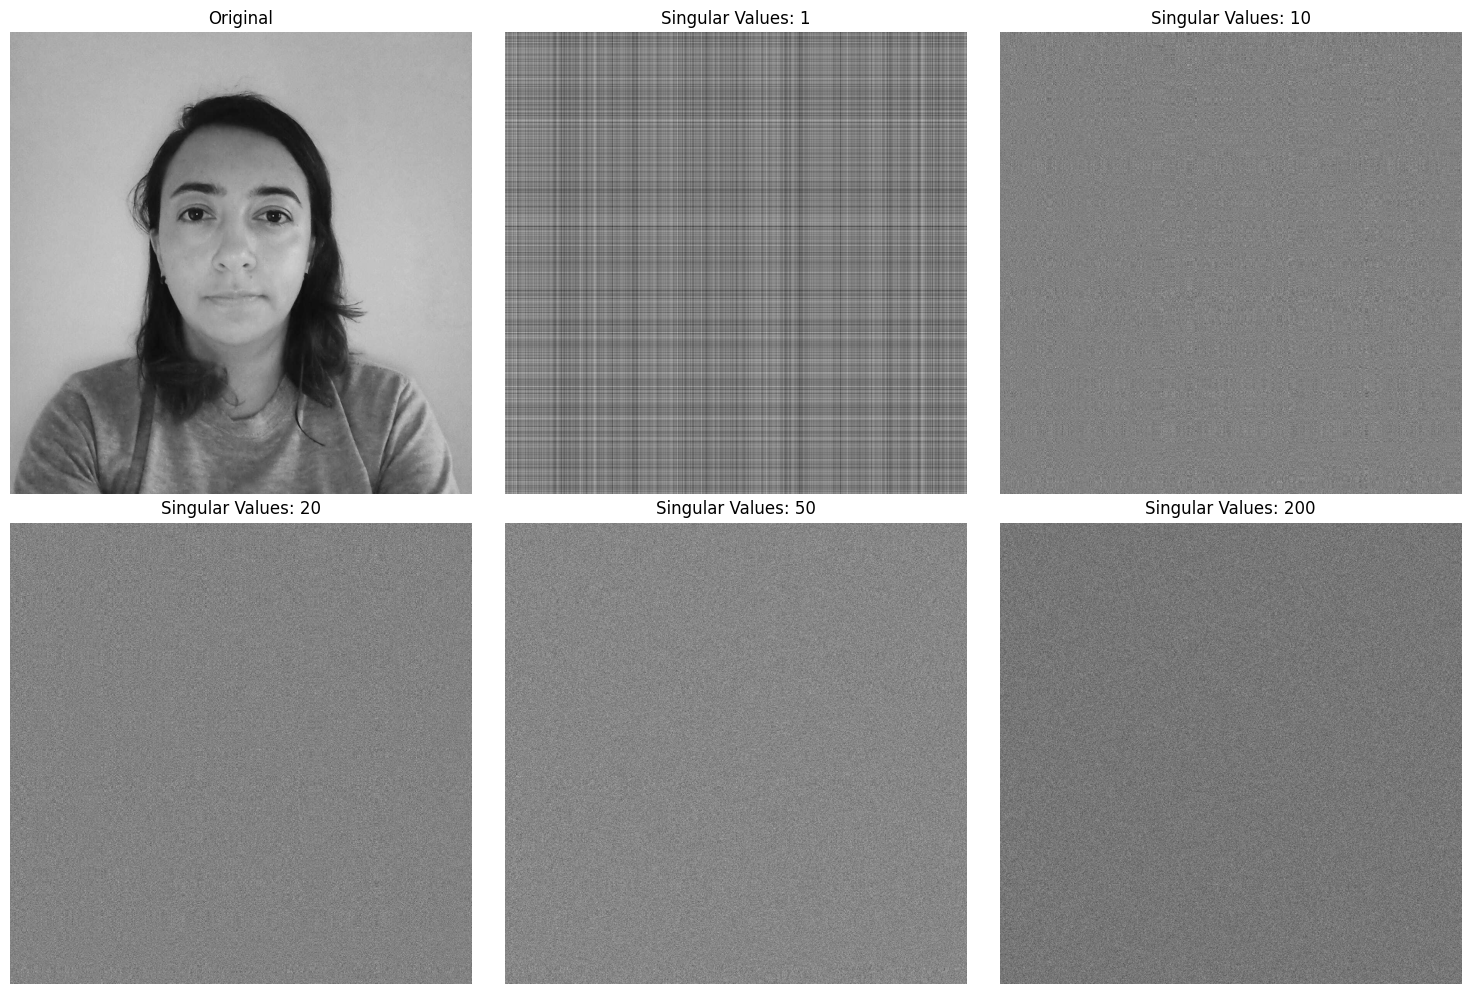

In [14]:
# Crear una instancia de la clase SVD
svd = SVD()

# Definir los valores singulares que deseas probar
singular_values = [1, 10, 20, 50, 200]

# Descomponer la matriz de la imagen en componentes singulares y plotear las imágenes resultantes
plot_images_with_singular_values(img_array, svd, singular_values)